<a href="https://colab.research.google.com/github/EDPS-7532/ups7532/blob/main/PyTorch_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이토치(PyTorch)

* 페이스북이 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기에 토치(Torch)는 넘파이(NumPy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공


## 파이토치의 구성요소

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용


## 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray와 유사
* GPU를 사용한 연산 가속 가능


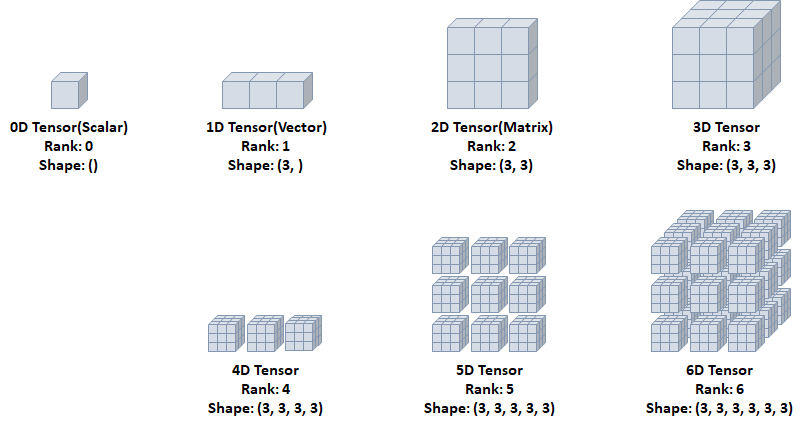

In [1]:
import torch
torch.__version__

'1.11.0+cu113'

In [2]:
# 텐서 초기화
x = torch.empty(4,2)
x

tensor([[2.2082e+06, 3.0639e-41],
        [3.3631e-44, 0.0000e+00],
        [       nan, 0.0000e+00],
        [1.1578e+27, 1.1362e+30]])

In [3]:
# 무작위로 초기화된 텐서
x = torch.rand(4,2)
x

tensor([[0.1691, 0.6588],
        [0.1321, 0.6116],
        [0.9312, 0.2215],
        [0.7706, 0.2148]])

In [4]:
# 데이터 타입이 long이고 0으로 채워진 텐서
x = torch.zeros(4,2,dtype=torch.long)
x

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])

In [5]:
# 사용자가 입력한 값으로 텐서 초기화
x = torch.tensor([3,2,3])
x

tensor([3, 2, 3])

In [6]:
# 2 X 4크기, double 타입, 1로 채워진 텐서
x = x.new_ones(2,4,dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [7]:
torch.ones(2,4)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [8]:
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[ 0.7667,  1.4995, -0.0168,  0.5491],
        [ 0.1559,  1.6503,  3.2458,  0.4468]])


In [9]:
# 텐서의 크기 계산
x.size()

torch.Size([2, 4])

In [10]:
x.shape

torch.Size([2, 4])

In [11]:
ft = torch.FloatTensor([1,2,3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [12]:
ft = torch.ByteTensor([1,2,3])
print(ft)
print(ft.dtype)

tensor([1, 2, 3], dtype=torch.uint8)
torch.uint8


In [13]:
ft = torch.CharTensor([1,2,3])
print(ft.float())
print(ft.double())
print(ft.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


In [14]:
ft = torch.LongTensor([1,2,3])
print(ft)
print(ft.dtype)
print(ft.short())
print(ft.int())
print(ft.long())

tensor([1, 2, 3])
torch.int64
tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [15]:
# CUDA Tensors : .to메소드를 사용하여 텐서를 어떠한 장치(CPU,GPU)로도 옮길 수 있다.
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.5983])
-0.5983169078826904
torch.float32


In [16]:
device = torch.device('cuda' if torch.cuda. is_available() else 'cpu')
print(device)

cuda


In [17]:
y = torch.ones_like(x,device=device)
print(y)
x = x.to(device)
print(x)
z = x+y
print(z)
print(z.to('cpu',torch.double))

tensor([1.], device='cuda:0')
tensor([-0.5983], device='cuda:0')
tensor([0.4017], device='cuda:0')
tensor([0.4017], dtype=torch.float64)


In [18]:
# 다차원 텐서 표현

# 0D Tensor(Scaler)
t0 = torch.tensor(0)
print(t0.ndim)
print(t0.size)
print(t0)

0
<built-in method size of Tensor object at 0x7f3e0cb7bb90>
tensor(0)


1D Tensor(Vector)

* 값들을 저장한 리스트와 유사한 텐서
* 하나의 축이 존재

In [19]:
# 1D Tensor
t1 = torch.tensor([1,2,3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


2D Tensor(Matrix)

* 행렬과 같은 모양으로 두개의 축이 존재
* 일반적인 수치, 통계 데이터셋이 해당
* 주로 샘플(samples)과 특성(features)을 가진 구조로 사용

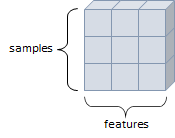

In [20]:
# 2D Tensor
t2 = torch.tensor([[1,2,3],
                  [4,5,6],
                  [7,8,9]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


[과제] 3,4,5 차원 텐서를 생성하여 출력하세요

3D Tensor

* 큐브(cube)와 같은 모양으로 세개의 축이 존재
* 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
* 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
* 주로 샘플(samples), 타임스텝(timesteps), 특성(features)을 가진 구조로 사용

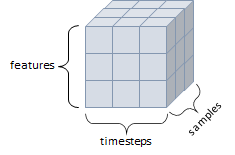

In [21]:
# 3D Tensor
t3 = torch.tensor([[[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]]])
print(t3.ndim)
print(t3.shape)
print(t3)

3
torch.Size([3, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


4D Tensor

* 4개의 축
* 컬러 이미지 데이터가 대표적인 사례 (흑백 이미지 데이터는 3D Tensor로 가능)
* 주로 샘플(samples), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

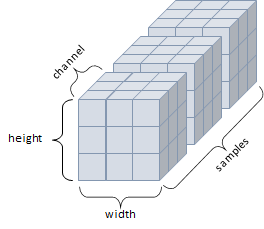

In [22]:
                  [[[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]],
                  [[1,2,3],
                  [4,5,6],
                  [7,8,9]]]

[[[1, 2, 3], [4, 5, 6], [7, 8, 9]],
 [[1, 2, 3], [4, 5, 6], [7, 8, 9]],
 [[1, 2, 3], [4, 5, 6], [7, 8, 9]]]

In [23]:
# 텐서의 연산

import math
a = torch.randn(1,2) * 2 - 1
print(a)
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5,0.5))

tensor([[-2.2694, -2.1130]])
tensor([[2.2694, 2.1130]])
tensor([[-2., -2.]])
tensor([[-3., -3.]])
tensor([[-0.5000, -0.5000]])


In [24]:
# 텐서의 연산2

In [25]:

print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a))
print(torch.unique(torch.tensor([1,2,3,1,2,1])))

tensor([[-2.2694, -2.1130]])
tensor(-2.2694)
tensor(-2.1130)
tensor(-2.1912)
tensor(0.1106)
tensor(4.7953)
tensor([1, 2, 3])


[과제]  2차원 텐서 x,y를 생성하여 덧셈(add), 뺄셈(sub), 곱셈(mul), 나눗셈(div), 내적 연산(matmul,mm) 사례를 pytorch로 1개 이상씩 수행하세요

In [26]:
x = torch.Tensor([[1,3],
                  [5,7]])
y = torch.Tensor([[2,4],
                  [6,8]])
print(x + y)
print(torch.add(x,y))
print(x.add(y))

tensor([[ 3.,  7.],
        [11., 15.]])
tensor([[ 3.,  7.],
        [11., 15.]])
tensor([[ 3.,  7.],
        [11., 15.]])


In [27]:
x = torch.Tensor([[1,3],
                  [5,7]])
y = torch.Tensor([[2,4],
                  [6,8]])
print(x - y)
print(torch.sub(x,y))
print(x.sub(y))

tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])


In [28]:
x = torch.Tensor([[1,3],
                  [5,7]])
y = torch.Tensor([[2,4],
                  [6,8]])
print(x * y)
print(torch.mul(x,y))
print(x.mul(y))

tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])


In [29]:
x = torch.Tensor([[1,3],
                  [5,7]])
y = torch.Tensor([[2,4],
                  [6,8]])
print(x / y)
print(torch.div(x,y))
print(x.div(y))

tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])


In [30]:
# 내적연산 (행렬곱 연산)
x = torch.Tensor([[1,3],
                  [5,7]])
y = torch.Tensor([[2,4],
                  [6,8]])
print(torch.mm(x,y))

tensor([[20., 28.],
        [52., 76.]])


In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# Manipulations
# 인덱싱: numpy 처럼 인덱싱 형태로 사용이 가능

x = torch.Tensor([[1,2],[3,4]])
print(x)

print(x[0,0])

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)


In [33]:
#슬라이싱
print(x[:,0])
print(x[0,:])

tensor([1., 3.])
tensor([1., 2.])


In [34]:
# view : 텐서의 크기(size)나 모양(shape)을 변경 
x = torch.randn(4,5)
print(x.shape)
print(x.size())

torch.Size([4, 5])
torch.Size([4, 5])


In [35]:
print(x,'\n')
y = x.view(20)  #view는 reshape와 유사하다
print(y)

tensor([[-6.9215e-01,  5.8811e-01,  1.0711e+00, -8.4466e-01, -8.7605e-01],
        [-7.7045e-01, -2.2913e+00, -1.6751e+00, -1.9420e+00, -1.1990e+00],
        [ 1.3369e-03, -4.5718e-01, -5.5196e-01,  3.5554e-01,  1.7221e+00],
        [ 6.5994e-01, -2.4599e-01,  9.1585e-01, -1.3479e+00,  5.4938e-01]]) 

tensor([-6.9215e-01,  5.8811e-01,  1.0711e+00, -8.4466e-01, -8.7605e-01,
        -7.7045e-01, -2.2913e+00, -1.6751e+00, -1.9420e+00, -1.1990e+00,
         1.3369e-03, -4.5718e-01, -5.5196e-01,  3.5554e-01,  1.7221e+00,
         6.5994e-01, -2.4599e-01,  9.1585e-01, -1.3479e+00,  5.4938e-01])


In [36]:
z = x.view(5,-1)
z

tensor([[-6.9215e-01,  5.8811e-01,  1.0711e+00, -8.4466e-01],
        [-8.7605e-01, -7.7045e-01, -2.2913e+00, -1.6751e+00],
        [-1.9420e+00, -1.1990e+00,  1.3369e-03, -4.5718e-01],
        [-5.5196e-01,  3.5554e-01,  1.7221e+00,  6.5994e-01],
        [-2.4599e-01,  9.1585e-01, -1.3479e+00,  5.4938e-01]])

In [37]:
# [과제]
x = torch.FloatTensor([ 
                       [1,2],
                       [3,4],
                       [5,6],
                       [7,8]
])
print(x)
# size를 활용한 텐서 사이즈 보기
x.size()
# shape를 활용한 텐서 사이즈 보기
x.shape
# dim을 활용한 텐서 차원 확인
x.dim()
# 0차원 사이즈 확인
x.size(0)
# 1차원 사이즈 확인
x.shape[0]

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])


4

In [38]:
import torch
x= torch.FloatTensor([
                      [1,2],
                     [3,4],
                      [5,6],
                      [7,8]])
print(x)
#size 를 활용한 텐서 사이즈 보기
print(x.size())
#  shape 를 활용한 텐서 사이즈 보기
print(x.shape)
# dim을 활용한 텐서 차원확인
print(x.dim)
#0차원 사이즈 확인
print(x.size(0))
#1차원 사이즈 확인
print(x.shape[1])


tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
torch.Size([4, 2])
torch.Size([4, 2])
<built-in method dim of Tensor object at 0x7f3e0cb35530>
4
2


| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |

In [39]:
# 스칼라값 하나만 존재해야 item() 사용 가능
x = torch.randn(1)
print(x)
print(x.item()) # item : randn에 있는 원소 1개를 뽑아줌
print(x.dtype)

tensor([0.6711])
0.6711108684539795
torch.float32


In [40]:
# squeeze : 차원을 축소
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.8596, 0.6482, 0.3737],
         [0.9564, 0.5099, 0.5889],
         [0.0423, 0.7238, 0.9217]]])
torch.Size([1, 3, 3])


In [41]:
t = tensor.squeeze()
print(t)
print(t.shape)

tensor([[0.8596, 0.6482, 0.3737],
        [0.9564, 0.5099, 0.5889],
        [0.0423, 0.7238, 0.9217]])
torch.Size([3, 3])


In [42]:
# unsqueeze : 차원을 증가
t = torch.rand(3,3)
print(t)
print(t.shape)

tensor([[0.8758, 0.0157, 0.9298],
        [0.0299, 0.7726, 0.4085],
        [0.7114, 0.6611, 0.9732]])
torch.Size([3, 3])


In [43]:
tensor = t.unsqueeze(dim=0)
print(tensor)
print(tensor.shape)

tensor([[[0.8758, 0.0157, 0.9298],
         [0.0299, 0.7726, 0.4085],
         [0.7114, 0.6611, 0.9732]]])
torch.Size([1, 3, 3])


In [44]:
tensor = t.unsqueeze(dim=2)
print(tensor)
print(tensor.shape)

tensor([[[0.8758],
         [0.0157],
         [0.9298]],

        [[0.0299],
         [0.7726],
         [0.4085]],

        [[0.7114],
         [0.6611],
         [0.9732]]])
torch.Size([3, 3, 1])


In [45]:
#stack : 텐서간 결합
x = torch.FloatTensor([1,4])
print(x)
y= torch.FloatTensor([2,5])
print(y)
z = torch.FloatTensor([3,6])
print(z)
print(torch.stack([x,y,z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


cat : 텐서를 결합하는 메소드(Concatenate)
 - stack과 유사하지만 쌓은 dim이 존재해야 함
 - 해당 차원을 늘려준 후 결합

In [46]:
 a = torch.randn(1,3,3)
 print(a)
 b = torch.randn(1,3,3)
 print(b)
 c = torch.cat((a,b), dim=0)
 print(c)
 print(c.size())

tensor([[[-0.5973, -0.6293,  0.3976],
         [-0.0036,  0.8536, -0.4443],
         [ 0.1332, -0.9899,  0.0191]]])
tensor([[[-1.3493, -1.5873,  0.2800],
         [-0.8511, -0.6022, -0.2234],
         [-1.0420,  0.6627, -0.8255]]])
tensor([[[-0.5973, -0.6293,  0.3976],
         [-0.0036,  0.8536, -0.4443],
         [ 0.1332, -0.9899,  0.0191]],

        [[-1.3493, -1.5873,  0.2800],
         [-0.8511, -0.6022, -0.2234],
         [-1.0420,  0.6627, -0.8255]]])
torch.Size([2, 3, 3])


In [47]:
#[1,6,3]

c = torch.cat((a,b), dim=1)
print(c)
print(c.size())


tensor([[[-0.5973, -0.6293,  0.3976],
         [-0.0036,  0.8536, -0.4443],
         [ 0.1332, -0.9899,  0.0191],
         [-1.3493, -1.5873,  0.2800],
         [-0.8511, -0.6022, -0.2234],
         [-1.0420,  0.6627, -0.8255]]])
torch.Size([1, 6, 3])


In [48]:
#chunk : 텐서를 여러 개로 나눌 때 사용(몇개로 나누는가?)
tensor = torch.rand(3,6)
print(tensor)

t1, t2, t3 = torch.chunk(tensor, 3, dim=1)
print(t1)
print(t2)
print(t3)

tensor([[0.4732, 0.5656, 0.0467, 0.0471, 0.7765, 0.3981],
        [0.5452, 0.1971, 0.3780, 0.7589, 0.2711, 0.2829],
        [0.9666, 0.7961, 0.2960, 0.1146, 0.3987, 0.8407]])
tensor([[0.4732, 0.5656],
        [0.5452, 0.1971],
        [0.9666, 0.7961]])
tensor([[0.0467, 0.0471],
        [0.3780, 0.7589],
        [0.2960, 0.1146]])
tensor([[0.7765, 0.3981],
        [0.2711, 0.2829],
        [0.3987, 0.8407]])


In [49]:
# split : chunk와 동일한 기능이지만 조금 다름(텐서의 크기는 몇인가?)
# torch.chunk(tensor, a, dim=b) tensor의 b차원텐서의 크기를 a로 정함 
tensor = torch.rand(3,6)
print(tensor)

t1, t2, t3 = torch.split(tensor, 2, dim=1)
print(t1)
print(t2)
print(t3)


tensor([[0.8889, 0.8349, 0.5448, 0.4601, 0.2767, 0.4621],
        [0.6859, 0.0010, 0.6749, 0.6510, 0.1274, 0.9931],
        [0.1911, 0.3792, 0.6993, 0.9822, 0.8793, 0.9049]])
tensor([[0.8889, 0.8349],
        [0.6859, 0.0010],
        [0.1911, 0.3792]])
tensor([[0.5448, 0.4601],
        [0.6749, 0.6510],
        [0.6993, 0.9822]])
tensor([[0.2767, 0.4621],
        [0.1274, 0.9931],
        [0.8793, 0.9049]])


torch ↔️ numpy
- Torch Tensor(텐서)를 NumPy array(배열)로 변환 가능
  - `numpy()`
  - `from_numpy()`
- Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함


In [50]:
from torch.cuda import is_available
device = torch.device('cuda' if torch.cuda. is_available() else 'cpu')
print(device)

cuda


In [51]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [52]:
print(a.to('cpu',torch.double))
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1., 1., 1.])


In [53]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [54]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [55]:
import numpy as np
a = np.ones(7)
b = torch.from_numpy(a)
np.add(a,1,out=a)
print(a)
print(b) # cpu에서 메모리 공유

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## Autograd(자동미분)

- `torch.autograd` 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- `backprop`를 위해 미분값을 자동으로 계산


https://tutorials.pytorch.kr/beginner/basics/autogradqs_tutorial.html


 - requires_grad 속성을 True로 설정하면 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작. 
 - 기록을 추적하는 것을 중단하게 하려면 .detach()를 호출하여 연산 기록으로 부터 분리
 - grad_fn : 미분값을 계산한 함수에 대한 정보를 저장(어떤 함수에 대해서 backprop 했는지 확인)

In [56]:
 a = torch.randn(3,3)
 a = a * 3
 print(a)
 print(a.requires_grad)

tensor([[ 0.9591,  2.3103,  0.6304],
        [ 2.2641,  3.4275, -2.9484],
        [-1.2331, -2.9616,  2.0550]])
False


requires_grad(...)는 기존 텐서의 requires_grad값을 바꿔치기(in-place)하여 결정

In [57]:
# in-place 방식으로 덴서의 값을 변경하는 연산 뒤에는 _가 붙음
x = torch.rand(2,2)
print(x)
y = torch.rand(2,2)
print(y)
y.add_(x)
print(y)

tensor([[0.0720, 0.0286],
        [0.1600, 0.2963]])
tensor([[5.4758e-01, 8.9884e-05],
        [3.6721e-01, 2.0930e-01]])
tensor([[0.6196, 0.0287],
        [0.5272, 0.5056]])


In [58]:
a.requires_grad_(True) #를 사용하면 inplace연산 
print(a.requires_grad)
b =(a * a).sum()
print(b)
print(b.grad_fn)

True
tensor(46.7367, grad_fn=<SumBackward0>)


In [59]:
# 기울기(Gradient)
x = torch.ones(3,3,requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [60]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [61]:
z = y * y
out = z.mean()
print(z,out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


In [62]:
print(out)
out.backward() # backward를 통해서 역전파 계산이 가능

tensor(36., grad_fn=<MeanBackward0>)


In [63]:
# grad : data가 거쳐온 layer에 대한 미분값 저장
print(x)
print(x.grad) # 미분값

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


`with torch.no_grad()`를 사용하여 기울기의 업데이트를 하지 않음

기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad()`로 감싸면 기울기 계산은 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용


In [64]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
  print((x**2).requires_grad)

True
True
False


In [65]:
# detach()
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)

True
False


### 자동 미분 흐름 예제

- 계산 흐름 $a \rightarrow b  \rightarrow c  \rightarrow out $

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해 $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면 $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [66]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [67]:
a = torch.ones(2,2,requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [68]:
print(a.data)
print(a.grad) # grad: 미분값
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
None
None


In [69]:
b = a +2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [70]:
c = b ** 2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [71]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


## 데이터 준비

파이토치에서는 데이터 준비를 위해 `torch.utils.data`의 `Dataset`과 `DataLoader` 사용 가능

- `Dataset`에는 다양한 데이터셋이 존재 (MNIST, FashionMNIST, CIFAR10, ...)
  - Vision Dataset: https://pytorch.org/vision/stable/datasets.html
  - Text Dataset: https://pytorch.org/text/stable/datasets.html
  - Audio Dataset: https://pytorch.org/audio/stable/datasets.html
- `DataLoader`와 `Dataset`을 통해 `batch_size`, `train` 여부, `transform` 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음


In [72]:
from torch.utils.data import Dataset, DataLoader


###토치비전(`torchvision`)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지

- `transforms`: 전처리할 때 사용하는 메소드 (https://pytorch.org/docs/stable/torchvision/transforms.html)
- `transforms`에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행


In [73]:
import torchvision.transforms as transforms
from torchvision import datasets

###`DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있고, `Compose`를 통해 리스트 안에 순서대로 전처리 진행

`ToTensor`()를 하는 이유는 `torchvision`이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환 필요


In [74]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize(mean=(0.5,),std=(1.0,))])


In [75]:
trainset = datasets.MNIST(root = '/content',
                          train=True, download=True,
                          transform=mnist_transform)
testset = datasets.MNIST(root ='/content/',
                         train=False, download=True,
                         transform=mnist_transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [76]:
!ls ./MNIST/raw

t10k-images-idx3-ubyte	   train-images-idx3-ubyte
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte	   train-labels-idx1-ubyte
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


In [77]:
# DataLoader는 데이터 전체를 보관했다가 실제 모델 학습을 할 때 batch_size 크기만큼 데이터를 가져옴
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=True, num_workers=2)


In [78]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [79]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

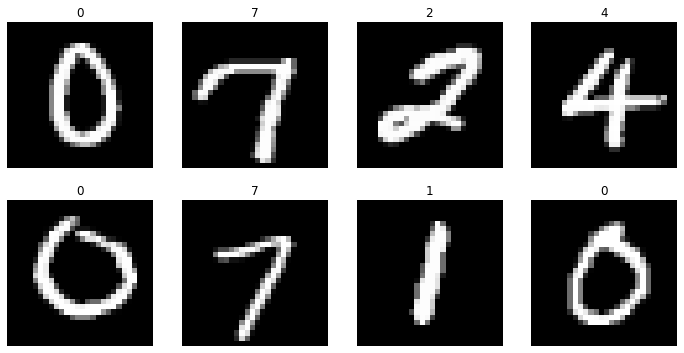

In [80]:
import matplotlib.pyplot as plt
figure=plt.figure(figsize=(12,6))
cols,rows = 4,2
for i in range(1,cols*rows+1):
  sample_idx=torch.randint(len(trainset),size=(1,)).item()
  img,label = trainset[sample_idx]
  figure.add_subplot(rows,cols,i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(img.squeeze(),cmap='gray')
plt.show()

## 신경망 구성

- 레이어(layer): 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
- 모듈(module): 한 개 이상의 계층이 모여서 구성
- 모델(model): 한 개 이상의 모듈이 모여서 구성


### `torch.nn` 패키지

주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용 (`weight`값들을 직접 선언 안함)

https://pytorch.org/docs/stable/nn.html


In [81]:
import torch.nn as nn

In [82]:
input = torch.randn(128,20)
print(input)

tensor([[-0.7029, -0.6906, -2.2677,  ..., -0.0923,  0.8021, -0.6185],
        [ 0.3895,  0.5008,  0.9180,  ...,  0.3213, -1.3562,  0.9035],
        [-0.8256, -0.6765,  1.0376,  ..., -1.2528, -1.1797,  0.4707],
        ...,
        [ 0.5882, -1.7715,  0.7128,  ..., -0.5367,  0.3444,  1.8323],
        [ 1.6402,  0.9023, -0.6604,  ..., -1.1311, -1.0091, -0.9945],
        [-0.6857, -0.8312, -1.0821,  ..., -0.3175,  1.0359, -0.7454]])


In [83]:
m = nn.Linear(20,30)
print(m)

Linear(in_features=20, out_features=30, bias=True)


In [84]:
output = m(input)
print(output)
print(output.size())

tensor([[-1.2127,  1.0865,  0.3646,  ..., -0.7237, -0.4960, -0.4313],
        [-0.4788,  0.2425,  1.1504,  ..., -0.5292, -0.9401,  0.5370],
        [ 0.5097,  0.0418,  0.3465,  ..., -0.2142, -0.0351,  0.5970],
        ...,
        [-0.2878,  0.9803, -0.2139,  ..., -0.1178,  0.2564, -0.6429],
        [-0.2741,  0.1468, -0.0291,  ...,  0.5140,  0.8322,  0.5783],
        [-1.6993,  0.9359, -0.8283,  ..., -0.4248, -0.4046,  0.0983]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 30])


In [85]:
# 4차원 텐서
input = torch.randn(20,16,50,100)
print(input.size())

torch.Size([20, 16, 50, 100])


### dilation

https://gaussian37.github.io/dl-concept-covolution_operation/#dilation-%EC%9D%B4%EB%9E%80-1


In [86]:
# kernal size(filtersize)
# dilation은 한 픽셀에서 다른 픽셀 까지의 거리
m = nn.Conv2d(16,33,3,stride=2)
m = nn.Conv2d(16,33,(3,5),stride=(2,1),padding=(4,2))
m = nn.Conv2d(16,33,(3,5),stride=(2,1),padding=(4,2),dilation=(3,1))
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [87]:
output = m(input)
print(output.size())

torch.Size([20, 33, 26, 100])


### 컨볼루션 레이어(Convolution Layers)

`nn.Conv2d` 예제

- `in_channels`: channel의 갯수
- `out_channels`: 출력 채널의 갯수
- `kernel_size`: 커널(필터) 사이즈


In [90]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5 , stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [91]:
#cpu로 보내기
layer = nn.Conv2d(1,50,5,1).to(torch.device('cpu'))
layer

Conv2d(1, 50, kernel_size=(5, 5), stride=(1, 1))

In [92]:
# weight 확인
weight = layer.weight
weight.shape

torch.Size([50, 1, 5, 5])

In [94]:
# weight는 detach()를 통해 꺼내주어야 numpy() 변환이 가능함
weight = weight.detach()
weight = weight.numpy()
weight.shape

(50, 1, 5, 5)

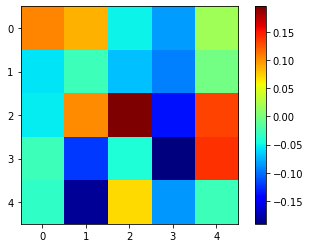

In [97]:
import matplotlib.pyplot as plt

plt.imshow(weight[0,0,:,:],'jet')
plt.colorbar()
plt.show()

In [101]:
# mnist image
print(images.shape)
print(images[0].size())

input_image = torch.squeeze(images[0])
print(input_image.size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [102]:
input_data = torch.unsqueeze(images[0],dim=0)
print(input_data.size())

torch.Size([1, 1, 28, 28])


In [106]:
output_data = layer(input_data)
output = output_data.data
output_arr = output.numpy()
output_arr.shape

(1, 50, 24, 24)

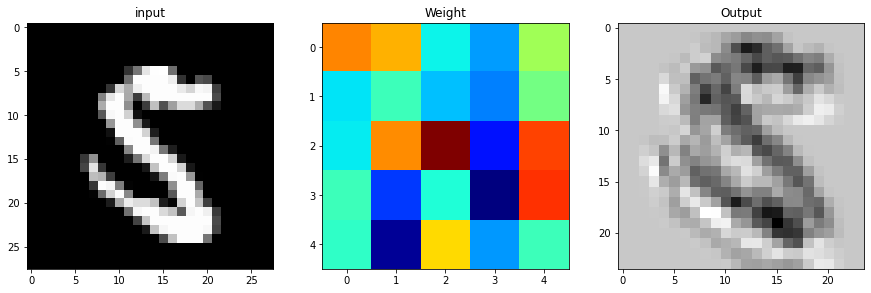

In [107]:
plt.figure(figsize=(15,30))
plt.subplot(131)
plt.title('input')
plt.imshow(input_image, 'gray')

plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0,0,:,:],'jet')

plt.subplot(133)
plt.title('Output')
plt.imshow(output_arr[0,0,:,:],'gray')


### 풀링 레이어(Pooling layers)

- `F.max_pool2d` 
  - `stride`
  - `kernel_size`
- `torch.nn.MaxPool2d` 도 많이 사용


In [108]:
import torch.nn.functional as F
pool = F.max_pool2d(output,2,2)
pool.shape

torch.Size([1, 50, 12, 12])

In [110]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 50, 12, 12)

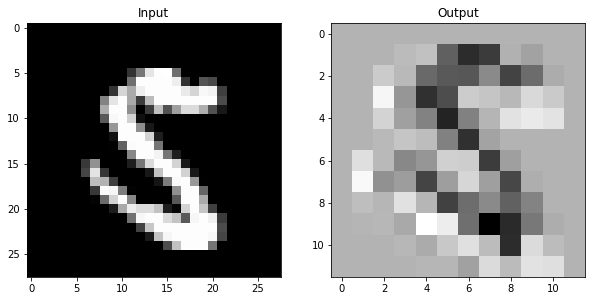

In [113]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.title('Input')
plt.imshow(input_image, 'gray')

plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0,0,:,:],'gray')

In [114]:
# 선형 레이어(Linear layer) : 1d만 가능하므로 .view()를 통해 1d로 펼쳐주어야 함
flatten = input_image.view(1,28 * 28)
flatten.shape

torch.Size([1, 784])

In [115]:
lin = nn.Linear(784,10)(flatten)
lin.shape

torch.Size([1, 10])

In [116]:
lin

tensor([[ 0.0664, -0.2274,  0.0286,  0.4669, -0.4865, -0.2670,  0.2065, -0.4819,
         -0.2106, -0.7268]], grad_fn=<AddmmBackward0>)

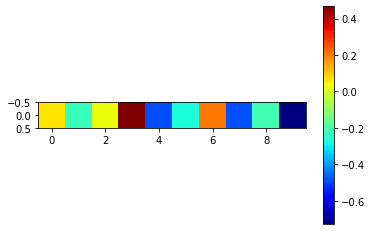

In [117]:
plt.imshow(lin.detach().numpy(),'jet')
plt.colorbar()
plt.show()

In [121]:
# 비선형 활성화(Non-Linear Activation)
with torch.no_grad():
  flatten = input_image.view(1,28 * 28)
  lin = nn.Linear(784,10)(flatten)
  softmax = F.softmax(lin,dim=1)

softmax

tensor([[0.0776, 0.0991, 0.1106, 0.0635, 0.0862, 0.1076, 0.0983, 0.1301, 0.1040,
         0.1229]])

In [122]:
import numpy as np
np.sum(softmax.numpy())

0.99999994

# 선형 회귀 모델

## 데이터 생성

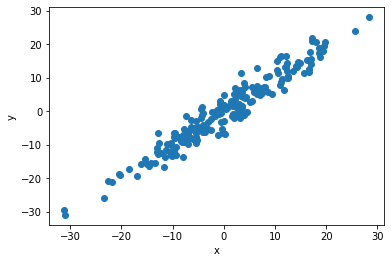

In [123]:
X = torch.randn(200,1)*10
y = X + 3 * torch.randn(200,1)
plt.scatter(X.numpy(),y.numpy())
plt.ylabel('y')
plt.xlabel('x')
plt.show() 

In [177]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.linear = nn.Linear(1,1)

  def forward(self,x):
    pred = self.linear(x)
    return pred

In [178]:
model = LinearRegressionModel()
print(model)
print(list(model.parameters()))

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[0.9237]], requires_grad=True), Parameter containing:
tensor([-0.7742], requires_grad=True)]


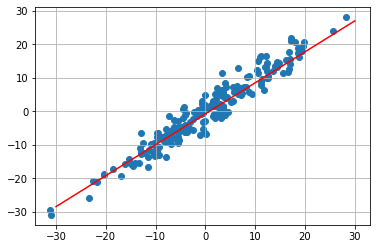

In [179]:
import numpy as np
w, b = model.parameters()
w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30,30]) 
y1 = w1 * x1 + b1

plt.plot(x1,y1,'r')
plt.scatter(X,y)
plt.grid()
plt.show()

## 손실 함수 및 옵티마이저

In [181]:
import torch.optim as optim
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

## 모델 학습

In [182]:
epochs = 100
losses = []

for epoch in range(epochs):
  optimizer.zero_grad()

  y_pred = model(X)
  loss = criterion(y_pred, y)
  losses.append(loss.item())
  loss.backward()  # 역전파 수행, 자동 미분 결과 업데이트

  optimizer.step() # 옵티마이저 스탭을 다음으로 진행

<function matplotlib.pyplot.show>

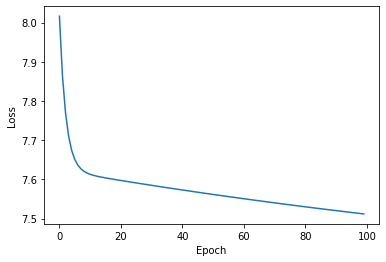

In [183]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show

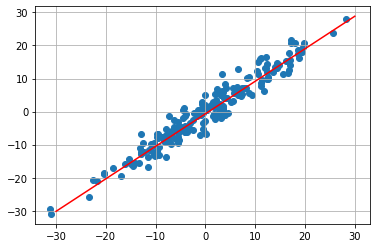

In [184]:
import numpy as np
w, b = model.parameters()
w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30,30]) 
y1 = w1 * x1 + b1

plt.plot(x1,y1,'r')
plt.scatter(X,y)
plt.grid()
plt.show()

# FashionMNIST 분류모델

## 데이터 로드

In [135]:
import torchvision 
from torch.utils.data import Dataset,DataLoader 
from torchvision import datasets
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5))])

In [138]:
trainset = datasets.FashionMNIST(root = '/content',
                                train = True, download=True,
                                transform=transform)
testset = datasets.FashionMNIST(root = '/content',
                                train = False, download=True,
                                transform=transform)

In [139]:
train_loader = DataLoader(trainset,batch_size=128, num_workers=2)
test_loader = DataLoader(testset,batch_size=128, num_workers=2)

In [140]:
# iter는 반복 가능한 객체에서 이터레이터를 반환하고 next함수는 이터레이터에서 값을 차례로 꺼내는 역할을 한다
images, labels = next(iter(train_loader))
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

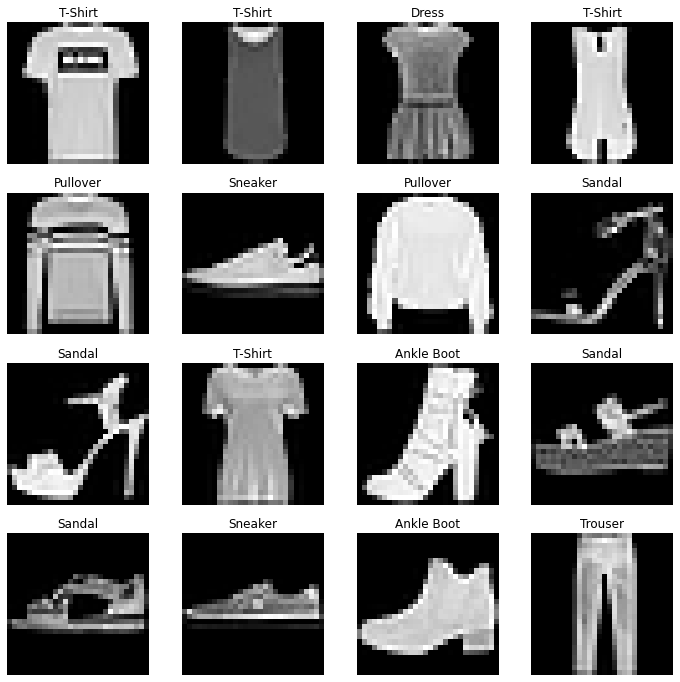

In [143]:
labels_map = {
    0:'T-Shirt',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle Boot',

}
figure = plt.figure(figsize=(12,12))
cols, rows = 4,4
for i in range(1,cols * rows+1):
  image = images[i].squeeze()
  label_idx = labels[i].item()
  label = labels_map[label_idx]

  figure.add_subplot(rows,cols,i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(image,cmap='gray')
plt.show()

### 모델 정의 및 파라미터

In [153]:
from re import S
import torch.nn.functional as F

class NeuralNet(nn.Module):
  def __init__(self):
    super(NeuralNet, self).__init__()

    self.conv1 = nn.Conv2d(1,6,3)
    self.conv2 = nn.Conv2d(6,16,3)
    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)),2)
    x = x.view(-1,self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
      
  def num_flat_features(self,x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s

    return num_features
net = NeuralNet()
print(net) 

NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [154]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [157]:
input = torch.randn(1,1,28,28)
out = net(input)
print(out)

tensor([[ 0.1637, -0.0884,  0.1232,  0.1331, -0.0238,  0.0566,  0.0826,  0.0810,
          0.0442,  0.1333]], grad_fn=<AddmmBackward0>)


### 손실함수와 옵티마이저

In [158]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


### 모델학습

In [159]:
total_batch = len(train_loader)
print(total_batch)

469


zero_grad()

보통 딥러닝에서는 미니배치+루프 조합을 사용해서 parameter들을 업데이트하는데,
한 루프에서 업데이트를 위해 loss.backward()를 호출하면 각 파라미터들의 .grad 값에 변화도가 저장이 된다.

이후 다음 루프에서 zero_grad()를 하지않고 역전파를 시키면 이전 루프에서 .grad에 저장된 값이 다음 루프의 업데이트에도 간섭을 해서 원하는 방향으로 학습이 안된다고 한다.

따라서 루프가 한번 돌고나서 역전파를 하기전에 반드시 zero_grad()로 .grad 값들을 0으로 초기화시킨 후 학습을 진행해야 한다.


In [160]:
for epoch in range(10):
  running_loss = 0.0 # 초기화

  for i, data in enumerate(train_loader,0):
    inputs, labels = data
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 100 ==99:
      print('Epoch:{}, iter:{}, Loss:{}'.format(epoch+1, i+1, running_loss/20000))
      running_loss = 0.0
      

Epoch:1, iter:100, Loss:0.011515939974784851
Epoch:1, iter:200, Loss:0.011473420178890229
Epoch:1, iter:300, Loss:0.01141892727613449
Epoch:1, iter:400, Loss:0.011316385662555694
Epoch:2, iter:100, Loss:0.010392659276723861
Epoch:2, iter:200, Loss:0.008198815393447877
Epoch:2, iter:300, Loss:0.005626836740970612
Epoch:2, iter:400, Loss:0.004419202494621277
Epoch:3, iter:100, Loss:0.003836798706650734
Epoch:3, iter:200, Loss:0.0037391003340482712
Epoch:3, iter:300, Loss:0.003629201835393906
Epoch:3, iter:400, Loss:0.0034472730278968812
Epoch:4, iter:100, Loss:0.0033600311383605004
Epoch:4, iter:200, Loss:0.00338323305696249
Epoch:4, iter:300, Loss:0.00332836326956749
Epoch:4, iter:400, Loss:0.0031810392379760743
Epoch:5, iter:100, Loss:0.0031343719020485877
Epoch:5, iter:200, Loss:0.0031820054426789286
Epoch:5, iter:300, Loss:0.0031269497618079184
Epoch:5, iter:400, Loss:0.0029911467626690864
Epoch:6, iter:100, Loss:0.0029601957961916925
Epoch:6, iter:200, Loss:0.0030177262023091318
Epo

### 모델의 저장 및 로드

- `torch.save`: `net.state_dict()`를 저장
- `torch.load`: `load_state_dict`로 모델을 로드


In [161]:
PATH = './fashion_mnist.pth'
torch.save(net.state_dict(), PATH)

In [162]:
net = NeuralNet()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [163]:
net.parameters

<bound method Module.parameters of NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

### 모델 테스트

In [164]:
def imshow(image):
  image = image / 2 + 0.5
  npimg = image.numpy()

  fit = plt.figure(figsize=(16,8))
  plt.imshow(np.transpose(npimg,(1,2,0))) #rgb를 gbr로 바꾼것
  plt.show()

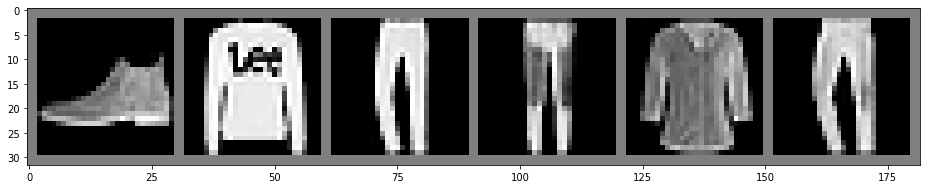

In [165]:
import torchvision

dataiter = iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images[:6]))


In [166]:
outputs = net(images)
_,predicted = torch.max(outputs,1)
print(predicted)

tensor([7, 2, 1, 1, 6, 1, 4, 6, 7, 7, 4, 5, 7, 3, 4, 1, 2, 6, 8, 0, 2, 7, 7, 5,
        1, 2, 4, 0, 9, 4, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 0, 9, 2, 7, 2, 1,
        2, 2, 2, 2, 5, 6, 4, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 0, 4, 7, 8, 7, 0,
        2, 0, 4, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 2, 5, 3, 6, 7, 1, 8,
        0, 1, 4, 2, 3, 4, 7, 2, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4])


In [167]:
print(''.join('{},'.format(labels_map[int(predicted[j].numpy())]) for j in range(6)))

Sneaker,Pullover,Trouser,Trouser,Shirt,Trouser,


### 평가점수

In [168]:
correct = 0
total = 0

with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = net(images)
    _,predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print(100*correct/total)

79.8
